# Keras CIFAR 10


# Import

In [6]:
import numpy as np
from numpy.random import seed
seed(888)
import tensorflow
tensorflow.random.set_seed(404)

In [8]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

%matplotlib inline

## Constants

In [9]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

## Get the data

In [10]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [11]:
type(cifar10)
type(x_train_all)

numpy.ndarray

## Explore the Data

In [12]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

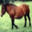

In [13]:
pic = array_to_img(x_train_all[7])
display(pic)

In [14]:
y_train_all.shape

(50000, 1)

In [15]:
y_train_all[7][0]

7

In [16]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

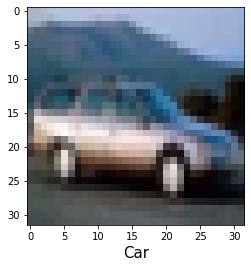

In [17]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

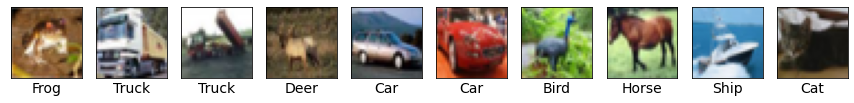

In [18]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [19]:
x_train_all[0].shape

(32, 32, 3)

In [20]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [21]:
x_test.shape

(10000, 32, 32, 3)

## Preprocess Data

In [22]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [23]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [24]:
x_train_all[0][0][0][0]

0.23137254901960785

In [25]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [26]:
x_train_all.shape

(50000, 3072)

In [27]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation Dataset

In [28]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [29]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

# Define the Neural Network using Keras

In [39]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

In [30]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

2022-02-06 05:09:41.781138: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(15, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [32]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(15, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [33]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [34]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


# Tensorboard (visualising learning)

In [49]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [37]:
samples_per_batch = 1000

In [54]:
%%time
nr_epochs = 150
model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory


2022-02-06 15:51:24.618506: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-06 15:51:24.618518: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-06 15:51:24.618564: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-06 15:51:25.011818: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-06 15:51:25.011838: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-06 15:51:25.037729: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-02-06 15:51:25.038611: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-06 15:51:25.039696: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: tensorboard_cifar_logs/Model 1 at 15 51/train/plugins/profile/2022_02_06_15_51_25
2022-02-06 15:51:25.

CPU times: user 1min 55s, sys: 2.03 s, total: 1min 58s
Wall time: 25.1 s


In [57]:
%%time
nr_epochs = 150
model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))

File exists


2022-02-06 15:52:42.521649: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-06 15:52:42.521664: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-06 15:52:42.521713: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-06 15:52:42.865930: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-06 15:52:42.865953: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-06 15:52:42.914923: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-02-06 15:52:42.915631: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-06 15:52:42.916322: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: tensorboard_cifar_logs/Model 2 at 15 52/train/plugins/profile/2022_02_06_15_52_42
2022-02-06 15:52:42.

CPU times: user 2min 3s, sys: 2.47 s, total: 2min 5s
Wall time: 26.4 s


In [53]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory


2022-02-06 15:49:31.618350: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-06 15:49:31.618370: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-06 15:49:31.618430: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-06 15:49:33.697885: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-06 15:49:33.697918: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-06 15:49:33.725985: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-02-06 15:49:33.726664: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-06 15:49:33.727512: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: tensorboard_cifar_logs/Model 1 XL at 15 49/train/plugins/profile/2022_02_06_15_49_33
2022-02-06 15:49:

CPU times: user 9min 53s, sys: 13.7 s, total: 10min 7s
Wall time: 1min 52s


In [58]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory


2022-02-06 15:57:40.074790: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-06 15:57:40.074816: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-06 15:57:40.075063: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-06 15:57:40.808111: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-06 15:57:40.808129: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-06 15:57:40.842194: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-02-06 15:57:40.843843: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-06 15:57:40.844654: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: tensorboard_cifar_logs/Model 2 XL at 15 57/train/plugins/profile/2022_02_06_15_57_40
2022-02-06 15:57:

CPU times: user 11min 59s, sys: 21 s, total: 12min 20s
Wall time: 2min 16s


In [59]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory


2022-02-06 15:59:56.669535: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-06 15:59:56.669547: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-06 15:59:56.669610: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-06 15:59:57.695499: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-06 15:59:57.695522: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-06 15:59:57.731924: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-02-06 15:59:57.732810: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-06 15:59:57.733839: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: tensorboard_cifar_logs/Model 2 XL at 15 59/train/plugins/profile/2022_02_06_15_59_57
2022-02-06 15:59:

KeyboardInterrupt: 

# Predictions on Individual Images

In [69]:
x_val[0].shape

(3072,)

In [70]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [71]:
np.set_printoptions(precision=3)

In [72]:
model_2.predict(test)

array([[4.918e-03, 2.463e-03, 7.733e-02, 2.250e-01, 1.170e-01, 1.540e-01,
        2.788e-01, 1.371e-01, 1.320e-04, 3.241e-03]], dtype=float32)

In [73]:
model_2.predict(x_val).shape

(10000, 10)

In [80]:
np.argmax(model_2.predict(test), axis=-1)

array([6])

In [77]:
y_val[0]

array([6], dtype=uint8)

In [82]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = np.argmax(model_2.predict(test_img), axis=-1)[0]
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

Actual value: 6 vs. predicted: 6
Actual value: 9 vs. predicted: 1
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 6
Actual value: 1 vs. predicted: 1
Actual value: 1 vs. predicted: 9
Actual value: 2 vs. predicted: 2
Actual value: 7 vs. predicted: 7
Actual value: 8 vs. predicted: 8
Actual value: 3 vs. predicted: 9


# Evaluation

In [83]:
model_2.metrics_names

['loss', 'accuracy']

In [84]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4169 - accuracy: 0.4996
Test loss is 1.42 and test accuracy is 50.0%


### Confusion Matrix

In [98]:
predictions = np.argmax(model_2.predict(x_test), axis=-1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [87]:
conf_matrix.shape

(10, 10)

In [88]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [89]:
conf_matrix.max()

649

In [90]:
conf_matrix.min()

6

In [91]:
conf_matrix[0]

array([606,  21,  59,  18,  47,   9,  21,  30, 153,  36])

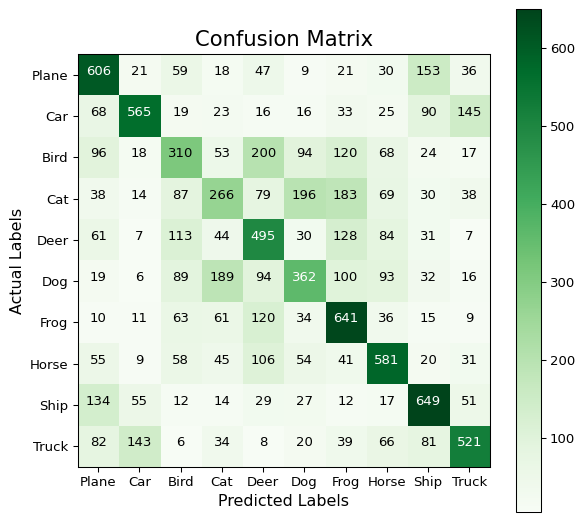

In [92]:
plt.figure(figsize=(7,7), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()

In [93]:
# True Positives
np.diag(conf_matrix)

array([606, 565, 310, 266, 495, 362, 641, 581, 649, 521])

In [94]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.606, 0.565, 0.31 , 0.266, 0.495, 0.362, 0.641, 0.581, 0.649,
       0.521])

In [95]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.518, 0.665, 0.38 , 0.356, 0.415, 0.43 , 0.486, 0.543, 0.577,
       0.598])

In [96]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 49.96%


In [97]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 precision score is 49.69%
Model 2 f score is 49.83%
